In [103]:
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np

In [104]:
df_one = pd.read_csv('datasets/Step_one.csv')
df_two = pd.read_csv('datasets/Step_two.csv')
df_three = pd.read_csv('datasets/Step_three.csv')

print(df_one.info()) #29934
print(df_two.info()) #24702
print(df_three.info()) #22742

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29934 entries, 0 to 29933
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  29934 non-null  object
 1   user_id     29934 non-null  int64 
 2   username    29934 non-null  object
 3   tweet       29934 non-null  object
 4   place       3638 non-null   object
 5   near        29934 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  24702 non-null  object 
 1   user_id     24702 non-null  int64  
 2   username    24702 non-null  object 
 3   tweet       24702 non-null  object 
 4   place       7069 non-null   object 
 5   near        24702 non-null  object 
 6   id          2088 non-null   float64
dtypes: float64(1), int64(1), object(5)


In [105]:
#merge all the datasets
all_df=[df_one, df_two, df_three]
all_df=pd.concat(all_df)
all_df = all_df.reset_index(drop=True)
print(len(all_df))
empty_tweet=all_df['tweet'].isna().value_counts()
print(empty_tweet) #no empty tweets

77378
tweet
False    77378
Name: count, dtype: int64


In [106]:
all_df['clean_tweet']= all_df['tweet'].copy()
# Drop 'id' column if it exists; ignore otherwise to avoid KeyError
all_df = all_df.drop(columns=['id'], errors='ignore')
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,UK Parliament: 2nd Covid Vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,First dose of vaccination 💉 5/1/2021..to comba...
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"Time to forget about #COVID, #Brexit and #Trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,@doctor_oxford Rachel you absolutely nailed it...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,My kids can never say they don’t wanna do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#BREAKING Health Secretary Matt Hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“Hundreds of flights full of Indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Sadiq Khan asks for vaccine blitz in variant-h...


In [107]:
#handle emoji
def convert_emoji(text):
    text=[emoji.demojize(tw) for tw in text]  #run slowly
    new_df= pd.DataFrame(text, columns=['tweet'])
    return new_df
new_df=convert_emoji(all_df['clean_tweet'])
new_df

,tweet
0,UK Parliament: 2nd Covid Vaccine should be 21 ...
1,First dose of vaccination :syringe: 5/1/2021.....
2,"Time to forget about #COVID, #Brexit and #Trum..."
3,@doctor_oxford Rachel you absolutely nailed it...
4,My kids can never say they don’t wanna do thei...
...,...
77373,Very little interest by politicians and media ...
77374,#BREAKING Health Secretary Matt Hancock has an...
77375,“Hundreds of flights full of Indian corona” co...
77376,Sadiq Khan asks for vaccine blitz in variant-h...


In [108]:
all_df[['clean_tweet']]=new_df[['tweet']].copy()  
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,UK Parliament: 2nd Covid Vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,First dose of vaccination :syringe: 5/1/2021.....
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"Time to forget about #COVID, #Brexit and #Trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,@doctor_oxford Rachel you absolutely nailed it...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,My kids can never say they don’t wanna do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#BREAKING Health Secretary Matt Hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“Hundreds of flights full of Indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",Sadiq Khan asks for vaccine blitz in variant-h...


In [109]:
#simple data cleaning
#reference:https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
def preprocessing_one(df):
    #lower all characters
    df['clean_tweet'] = df['clean_tweet'].str.lower()
    #remove all the mentions: @username
    df['clean_tweet'] = df['clean_tweet'].replace(r'@\w+', '', regex=True)
    #remove all the links in the original tweets (start with "www" and "http")
    df['clean_tweet'] = df['clean_tweet'].replace(r'http\S+|rhttps\S+|rwww\S+', '', regex=True)   
    return df
#Notice: Remove punctuation and special characters after handling contraction words
preprocessing_one(all_df)

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,uk parliament: 2nd covid vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose of vaccination :syringe: 5/1/2021.....
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"time to forget about #covid, #brexit and #trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed it tonight on t...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,my kids can never say they don’t wanna do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#breaking health secretary matt hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“hundreds of flights full of indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks for vaccine blitz in variant-h...


In [110]:
#Handling repeated characters
#reference: https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
#https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python
from nltk.corpus import wordnet
# re.sub(pattern, repl, string, count): pattern(Eligible pattern)，repl(replace to...), string
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word  #test for words existence
    #repl_new= repeat_pattern.sub(repl_word, word)
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new
word1='loooove'
print(repeated_char(word1))

love


In [111]:
def check_repeated (tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]  #find all the words with repeated characters
    for word in word_set:
        if not wordnet.synsets(word):
            tweet=re.sub(word, repeated_char(word), tweet)
    return tweet
#test the function
tweet1='I looove you, soooo much'
print(check_repeated (tweet1))

I love you, so much


In [112]:
#replace words contraction
#reference:https://github.com/kiran-bal/Disaster_tweets_classifier/blob/2e6d648f5ef9cbe67024ad5cf032582fc4dc3a75/version2/notebooks/Disaster_tweet_classifier.ipynb
#re.sub(pattern, repl, string, count=0, flags=0): count=0: all matched will be replaced
# Use raw strings for patterns and replacement backreferences to avoid invalid escape warnings
contraction_dict = [
    (r"I\'m", 'I am'), (r"i\'m", 'i am'), (r"ain\'t", 'am not'),
    (r"(\w+)\'s", r"\g<1> is"), (r"(\w+)\'re", r"\g<1> are"), (r"(\w+)n\'t", r"\g<1> not"),
    (r"can\'t", 'can not'), (r"won\'t", 'will not'), (r"wont", 'will not'),
    (r"(\w+)\'ll", r"\g<1> will"), (r"(\w+)\'d", r"\g<1> would"), (r"(\w+)\'ve", r"\g<1> have"),
    # Right single quotation mark variants
    (r"I\’m", 'I am'), (r"i\’m", 'i am'), (r"ain\’t", 'am not'),
    (r"(\w+)\’s", r"\g<1> is"), (r"(\w+)\’re", r"\g<1> are"), (r"(\w+)n\’t", r"\g<1> not"),
    (r"can\’t", 'can not'), (r"won\’t", 'will not'), (r"(\w+)\’ll", r"\g<1> will"), (r"(\w+)\’d", r"\g<1> would"), (r"(\w+)\’ve", r"\g<1> have"),
    (r"aren", 'are not'), (r"couldn", 'could not'), (r"didn", 'did not'), (r"doesn", 'does not'), (r"hadn", 'had not'),
    (r"hasn", 'has not'), (r"haven", 'have not'), (r"isn", 'is not'), (r"mightn", 'might not'), (r"mustn", 'must not'), (r"needn", 'need not'),
    (r"shan", 'shall not'), (r"shouldn", 'should not'), (r"wasn", 'was not'), (r"weren", 'were not'), (r"wouldn", 'would not'),
    (r"hasnt", 'has not'), (r"wasnt", 'was not'), (r"werent", 'were not'), (r"didnt", 'did not'), (r"doesnt", 'does not'), (r"couldnt", 'could not'), (r"shouldnt", 'should not'), (r"wouldnt", 'would not'),
    (r"mustnt", 'must not'), (r"neednt", 'need not'), (r"mightnt", 'might not'), (r"oughtnt", 'ought not'), (r"shant", 'shall not'), (r"wont've", 'will not have'),
    (r"cant", 'can not')
]
#Notice: The quotation of some texts are not in English

def handle_contraction(text):
    patterns_set = [(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in patterns_set:
        text = re.sub(pattern, repl, text)
    return text
#test
print(all_df['clean_tweet'][4])
print(handle_contraction(all_df['clean_tweet'][4]))

my kids can never say they don’t wanna do their homework. i’ve got :sparkles:covid 19 :sparkles: and i’m still banging out my 2,000 word essay, you have no excuse x
my kids can never say they do not wanna do their homework. i have got :sparkles:covid 19 :sparkles: and i am still banging out my 2,000 word essay, you have no excuse x


In [113]:
def preprocessing_two(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: check_repeated(x)) #remove repeated charaters
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: handle_contraction(x)) #handle constraction
    return df
all_df=preprocessing_two(all_df)
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,uk parliament: 2nd covid vaccine should be 21 ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose of vaccination :syringe: 5/1/2021.....
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,"time to forget about #covid, #brexit and #trum..."
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed it tonight on t...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,my kids can never say they do not wana do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",#breaking health secretary matt hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",“hundreds of flights full of indian corona” co...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks for vaccine blitz in variant-h...


In [114]:
#only English character
def replace_non_alphabetical(df):
    df['clean_tweet'] = df['clean_tweet'].replace(r'[^a-zA-Z]', ' ', regex=True)
    df['clean_tweet'] = df['clean_tweet'].replace(r'\s+', ' ', regex=True)
    return df
all_df = replace_non_alphabetical(all_df)
all_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,uk parliament nd covid vaccine should be days ...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose of vaccination syringe to combating...
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time to forget about covid brexit and trump an...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed it tonight on th...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,my kids can never say they do not wana do thei...
...,...,...,...,...,...,...,...
77373,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very little interest by politicians and media ...
77374,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock has an...
77375,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds of flights full of indian corona com...
77376,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan asks for vaccine blitz in variant h...


In [115]:
#remove less than two-character words, but keep "no" if len(w)>2 or w=="no"
def short_words(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=="no"]))
    return df
all_df=short_words(all_df)
all_df.head()

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06 23:43:48 GMT 标准时间,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine should days not weeks...
1,2021-01-06 23:43:16 GMT 标准时间,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,first dose vaccination syringe combating covid
2,2021-01-06 23:40:17 GMT 标准时间,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget about covid brexit and trump and s...
3,2021-01-06 23:36:32 GMT 标准时间,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel you absolutely nailed tonight throughou...
4,2021-01-06 23:33:50 GMT 标准时间,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids can never say they not wana their homewor...


In [116]:
#remove stopwords
#can't remove words like "not" or "no"

In [117]:
#create own stopwords
my_stopwords = [x for x in open('stopwords.txt','r', encoding="utf-8").read().split('\n')]
print(my_stopwords)

def remove_stopwords(df):
    df['clean_tweet']=df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in my_stopwords]))
    return df
all_df=remove_stopwords(all_df)
all_df
all_df.to_csv('clean_datasets/all_clean_1_test.csv',index = False, encoding='utf_8_sig')

["'ll", "'tis", "'twas", "'ve", '10', '39', 'a', "a's", 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', 'al', 'all', 'allow', 'allows', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'arise', 'around', 'arpa', 'as', 'aside', 'ask', 'asked', 'asking', 'asks', 'associated', 'at', 'au', 'auth', 'available', 'aw', 'away', 'awfully', 'az', 'b', 'ba', 'back', 'backed', 'backing', 'backs', 'backward', 'backwards', 'bb', 'bd', 'be', '

In [118]:
#remove empty tweets
def remove_empty(df):
    # Ensure NaNs are treated as empty
    df = df[df['clean_tweet'].fillna('') != '']
    return df
all_df = remove_empty(all_df)
all_df = all_df.reset_index(drop=True)
# Drop 'id' column if present; ignore otherwise to avoid KeyError
all_df = all_df.drop(columns=['id'], errors='ignore')
all_df
all_df.to_csv('clean_datasets/all_clean_1.csv', index=False, encoding='utf_8_sig')

In [119]:
#split the clean datasets into three steps
all_df.to_csv('clean_datasets/all_clean_1.csv',index = False, encoding='utf_8_sig')

In [120]:
clean_df = pd.read_csv('clean_datasets/all_clean_1.csv')
clean_df['created_at'] = clean_df['created_at'].str.extract(r'(^\d{4}[-/]\d{2}[-/]\d{2})')
clean_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine should days not weeks...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,dose vaccination syringe combating covid
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget covid brexit trump sleep listening...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight program conti...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never not wana homework sparkles covid sp...
...,...,...,...,...,...,...,...
77336,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very politicians media china economy thriving ...
77337,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77338,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights indian corona pretty racist
77339,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan vaccine blitz variant hit london bo...


In [121]:
clean_df['created_at'] = pd.to_datetime(clean_df['created_at'] , utc=True).dt.date
clean_df.to_csv('clean_datasets/all_clean_1.csv',index = False, encoding='utf_8_sig')
clean_df

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine should days not weeks...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,dose vaccination syringe combating covid
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget covid brexit trump sleep listening...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight program conti...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never not wana homework sparkles covid sp...
...,...,...,...,...,...,...,...
77336,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very politicians media china economy thriving ...
77337,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
77338,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights indian corona pretty racist
77339,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan vaccine blitz variant hit london bo...


In [122]:
import datetime
clean_step_one = clean_df[(clean_df['created_at']) < datetime.date(2021,3,8)].reset_index(drop=True)
print("step_one:",len(clean_step_one))

step_one: 29920


In [123]:
clean_step_two = clean_df[((clean_df['created_at']) >= datetime.date(2021,3,8)) & ((clean_df['created_at']) < datetime.date(2021,5,17))].reset_index(drop=True)
print("step_two:",len(clean_step_two))
# clean_step_two

step_two: 24682


In [124]:
clean_step_three= clean_df[((clean_df['created_at']) >= datetime.date(2021,5,17)) & ((clean_df['created_at']) <= datetime.date(2021,7,18))].reset_index(drop=True)
print("step_three:",len(clean_step_three))
# clean_step_three

step_three: 22719


In [125]:
#save as csv
clean_step_one.to_csv('clean_datasets/clean_step1.csv',index = False, encoding='utf_8_sig')
clean_step_two.to_csv('clean_datasets/clean_step2.csv',index = False, encoding='utf_8_sig')
clean_step_three.to_csv('clean_datasets/clean_step3.csv',index = False, encoding='utf_8_sig')

In [126]:
len(clean_step_one)+len(clean_step_two)+len(clean_step_three)

77321

In [127]:
clean_all=[clean_step_one,clean_step_two,clean_step_three]
clean_all=pd.concat(clean_all)
clean_all_dfs=clean_all.reset_index(drop=True)
# new_dfs.to_csv("unsupervised_datasets/lexicon_all.csv")
clean_all.to_csv('clean_datasets/clean_all.csv',index = False, encoding='utf_8_sig') #final clean datasets
clean_all

,created_at,user_id,username,tweet,place,near,clean_tweet
0,2021-01-06,293175196,sjtafalla,UK Parliament: 2nd Covid Vaccine should be 21 ...,NaN,London,parliament covid vaccine should days not weeks...
1,2021-01-06,1591779799,ellieelif,First dose of vaccination 💉 5/1/2021..to comba...,NaN,London,dose vaccination syringe combating covid
2,2021-01-06,215143656,danananarama,"Time to forget about #COVID, #Brexit and #Trum...",NaN,London,time forget covid brexit trump sleep listening...
3,2021-01-06,336462129,veronica_foote_,@doctor_oxford Rachel you absolutely nailed it...,NaN,London,rachel absolutely nailed tonight program conti...
4,2021-01-06,1063705581133934593,5herii,My kids can never say they don’t wanna do thei...,NaN,London,kids never not wana homework sparkles covid sp...
...,...,...,...,...,...,...,...
22714,2021-05-20,1161700993840680961,PhilipCrook9,Very little interest by politicians and media ...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",very politicians media china economy thriving ...
22715,2021-05-19,146596633,edwardjsault,#BREAKING Health Secretary Matt Hancock has an...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",breaking health secretary matt hancock announc...
22716,2021-05-19,235304684,phoTomics,“Hundreds of flights full of Indian corona” co...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",hundreds flights indian corona pretty racist
22717,2021-05-17,726443182997835778,SarahClift10,Sadiq Khan asks for vaccine blitz in variant-h...,"{'type': 'Feature', 'bbox': [-1.476463, 50.883...","Southampton, England",sadiq khan vaccine blitz variant hit london bo...


In [128]:
#The number of tweets collected in each city
#London
London_df = clean_all[clean_all['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Total tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_all[clean_all['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Total tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_all[clean_all['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Total tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_all[clean_all['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Total tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_all[clean_all['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Total tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_all[clean_all['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Total tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_all[clean_all['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Total tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_all[clean_all['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Total tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_all[clean_all['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Total tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_all[clean_all['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Total tweets in Southampton:",len(Southampton_df))
print(len(London_df)+len(Birmingham_df)+len(Bristol_df)+len(Leeds_df)+len(Liverpool_df)+len(Manchester_df)+len(Newcastle_df)+len(Nottingham_df)+len(Sheffield_df)+len(Southampton_df))

Total tweets in London: 37670
Total tweets in Birmingham: 6707
Total tweets in Bristol: 3762
Total tweets in Leeds: 4240
Total tweets in Liverpool: 5530
Total tweets in Manchester: 9192
Total tweets in Newcastle: 852
Total tweets in Nottingham: 2991
Total tweets in Sheffield: 3720
Total tweets in Southampton: 2654
77318


In [129]:
cities = {"city": ["London", "Manchester", "Birmingham", "Liverpool", "Leeds", "Bristol", "Sheffield", "Nottingham","Southampton", "Newcastle"],
           "total number":[len(London_df),  len(Manchester_df), len(Birmingham_df), len(Liverpool_df), len(Leeds_df), len(Bristol_df), len(Sheffield_df),len(Nottingham_df),len(Southampton_df), len(Newcastle_df)]}
city_frame  = pd.DataFrame(data = cities)
city_frame.to_csv('Drawing/all_cities.csv',index = False)
city_frame

,city,total number
0,London,37670
1,Manchester,9192
2,Birmingham,6707
3,Liverpool,5530
4,Leeds,4240
5,Bristol,3762
6,Sheffield,3720
7,Nottingham,2991
8,Southampton,2654
9,Newcastle,852


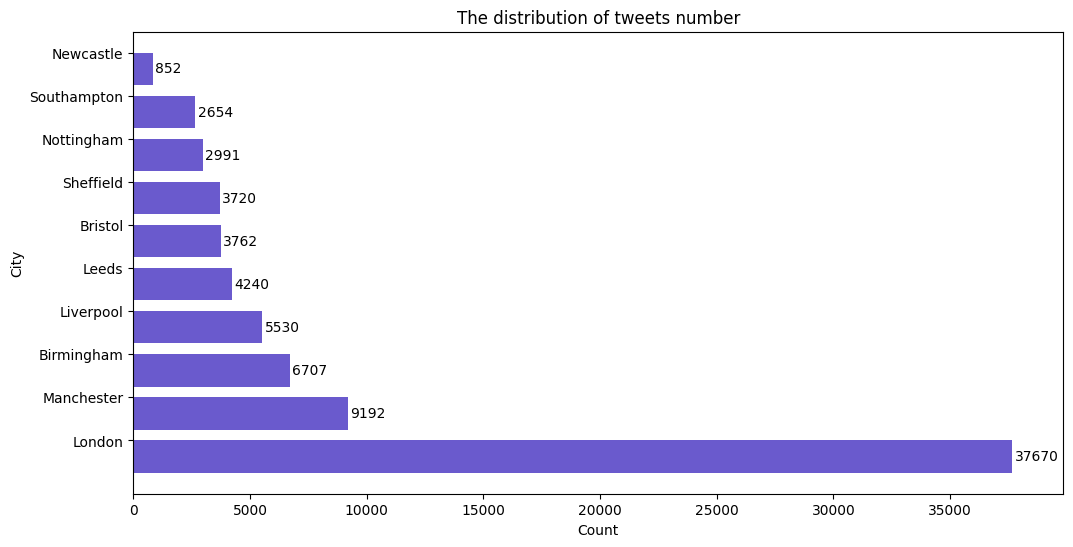

In [130]:
#reference: https://stackoverflow.com/questions/60212294/how-to-add-labels-to-a-horizontal-bar-chart-in-matplotlib
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()   

width = 0.75 # bar's width 
x_loc = np.arange(len(city_frame['total number']))  # the x locations
ax.barh(x_loc, city_frame['total number'], width, color="slateblue")
ax.set_yticks(x_loc+width/2)
ax.set_yticklabels(city_frame['city'], minor=False)

_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
for i, v in enumerate(city_frame['total number']):
    ax.text(v + 100, i, str(v), color='black', fontsize=10, ha='left', va='center')
    
plt.title('The distribution of tweets number')
plt.xlabel('Count')
plt.ylabel('City')

# plt.show()
plt.savefig("visualizations/tweets distribution")

In [131]:
#The number of tweets collected in each city
#step 1
#London
London_df = clean_step_one[clean_step_one['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step1 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_one[clean_step_one['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step1 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_one[clean_step_one['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step1 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_one[clean_step_one['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step1 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_one[clean_step_one['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step1 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_one[clean_step_one['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step1 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_one[clean_step_one['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step1 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_one[clean_step_one['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step1 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_one[clean_step_one['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step1 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_one[clean_step_one['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step1 tweets in Southampton:",len(Southampton_df))

Step1 tweets in London: 12870
Step1 tweets in Birmingham: 3009
Step1 tweets in Bristol: 1572
Step1 tweets in Leeds: 1856
Step1 tweets in Liverpool: 2372
Step1 tweets in Manchester: 3795
Step1 tweets in Newcastle: 239
Step1 tweets in Nottingham: 1314
Step1 tweets in Sheffield: 1604
Step1 tweets in Southampton: 1287


In [132]:
#step 2
#The number of tweets collected in each city
#London
London_df = clean_step_two[clean_step_two['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step2 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_two[clean_step_two['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step2 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_two[clean_step_two['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step2 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_two[clean_step_two['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step2 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_two[clean_step_two['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step2 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_two[clean_step_two['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step2 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_two[clean_step_two['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step2 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_two[clean_step_two['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step2 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_two[clean_step_two['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step2 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_two[clean_step_two['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step2 tweets in Southampton:",len(Southampton_df))

Step2 tweets in London: 12938
Step2 tweets in Birmingham: 1905
Step2 tweets in Bristol: 1003
Step2 tweets in Leeds: 1214
Step2 tweets in Liverpool: 1652
Step2 tweets in Manchester: 2838
Step2 tweets in Newcastle: 249
Step2 tweets in Nottingham: 942
Step2 tweets in Sheffield: 1185
Step2 tweets in Southampton: 755


In [133]:
#step 3
#The number of tweets collected in each city
#London
London_df = clean_step_three[clean_step_three['near'].str.contains('London|london')]
London_df = London_df.reset_index(drop=True)
print("Step3 tweets in London:",len(London_df))
#Birmingham
Birmingham_df = clean_step_three[clean_step_three['near'].str.contains('Birmingham|birmingham')]
Birmingham_df = Birmingham_df.reset_index(drop=True)
print("Step3 tweets in Birmingham:",len(Birmingham_df))
#Bristol
Bristol_df = clean_step_three[clean_step_three['near'].str.contains('Bristol|Bristol')]
Bristol_df = Bristol_df.reset_index(drop=True)
print("Step3 tweets in Bristol:",len(Bristol_df))
#Leeds
Leeds_df = clean_step_three[clean_step_three['near'].str.contains('Leeds|leeds')]
Leeds_df = Leeds_df.reset_index(drop=True)
print("Step3 tweets in Leeds:",len(Leeds_df))
#Liverpool
Liverpool_df = clean_step_three[clean_step_three['near'].str.contains('Liverpool|liverpool')]
Liverpool_df = Liverpool_df.reset_index(drop=True)
print("Step3 tweets in Liverpool:",len(Liverpool_df))
#Manchester
Manchester_df = clean_step_three[clean_step_three['near'].str.contains('Manchester|manchester')]
Manchester_df = Manchester_df.reset_index(drop=True)
print("Step3 tweets in Manchester:",len(Manchester_df))
#Newcastle
Newcastle_df = clean_step_three[clean_step_three['near'].str.contains('Newcastle|newcastle')]
Newcastle_df = Newcastle_df.reset_index(drop=True)
print("Step3 tweets in Newcastle:",len(Newcastle_df))
#Nottingham
Nottingham_df = clean_step_three[clean_step_three['near'].str.contains('Nottingham|nottingham')]
Nottingham_df = Nottingham_df.reset_index(drop=True)
print("Step3 tweets in Nottingham:",len(Nottingham_df))
#Sheffield
Sheffield_df = clean_step_three[clean_step_three['near'].str.contains('Sheffield|sheffield')]
Sheffield_df = Sheffield_df.reset_index(drop=True)
print("Step3 tweets in Sheffield:",len(Sheffield_df))
#Southampton
Southampton_df = clean_step_three[clean_step_three['near'].str.contains('Southampton|southampton')]
Southampton_df = Southampton_df.reset_index(drop=True)
print("Step3 tweets in Southampton:",len(Southampton_df))

Step3 tweets in London: 11862
Step3 tweets in Birmingham: 1793
Step3 tweets in Bristol: 1187
Step3 tweets in Leeds: 1170
Step3 tweets in Liverpool: 1506
Step3 tweets in Manchester: 2559
Step3 tweets in Newcastle: 364
Step3 tweets in Nottingham: 735
Step3 tweets in Sheffield: 931
Step3 tweets in Southampton: 612


In [134]:
#stack bar chart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
Steps_df = pd.DataFrame([['Stage1', 12870, 3010, 1572, 1857, 2372, 3796, 239, 1315, 1604, 1287], 
                   ['Stage2', 12945, 1905, 1003, 1214, 1652, 2838, 249, 942, 1185, 755], 
                   ['Stage3', 11863, 1793, 1187, 1170, 1506, 2559, 364, 735, 931, 612]],
                  columns=['Stages', 'London','Birmingham','Bristol','Leeds','Liverpool','Manchester','Newcastle','Nottingham','Sheffield','Southampton'])
Steps_df.to_csv('visualizations/Drawing/three_steps_cities.csv',index = False, encoding='utf_8_sig')
Steps_df

,Stages,London,Birmingham,Bristol,Leeds,Liverpool,Manchester,Newcastle,Nottingham,Sheffield,Southampton
0,Stage1,12870,3010,1572,1857,2372,3796,239,1315,1604,1287
1,Stage2,12945,1905,1003,1214,1652,2838,249,942,1185,755
2,Stage3,11863,1793,1187,1170,1506,2559,364,735,931,612


(array([0, 1, 2]),
 [Text(0, 0, 'Stage1'), Text(1, 0, 'Stage2'), Text(2, 0, 'Stage3')])

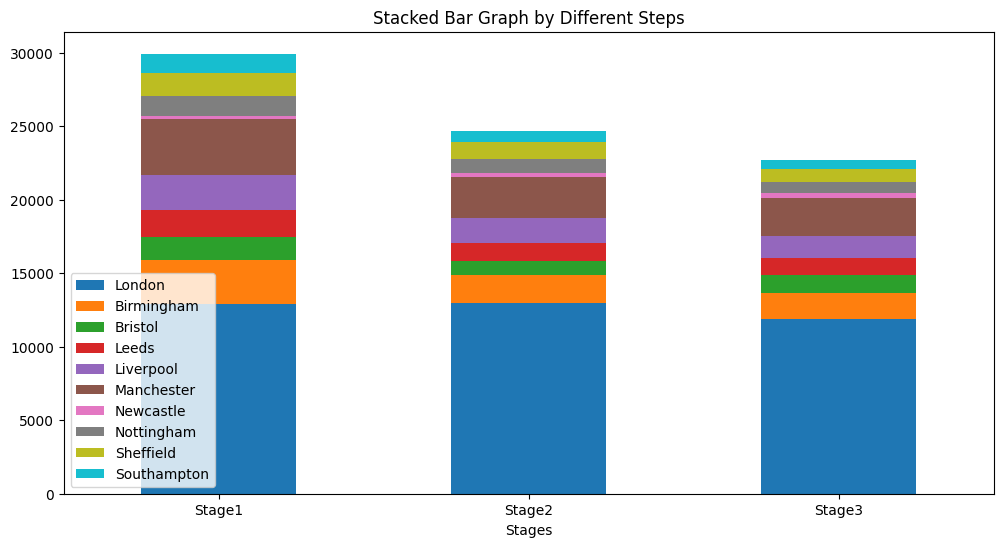

In [135]:
# plt.xticks(rotation=0, ha='center')
Steps_df.plot(x='Stages', kind='bar', stacked=True,
        title='Stacked Bar Graph by Different Steps')
plt.xticks(rotation=0, ha='center')

In [136]:
# Audit stopwords that still appear in clean_tweet using NLTK and scikit-learn
import pandas as pd
import re
from collections import Counter

# Ensure we have the latest cleaned data loaded
try:
    df = pd.read_csv('clean_datasets/all_clean_1.csv')
except Exception:
    # Fallback to the in-memory DataFrame if available
    df = clean_df if 'clean_df' in globals() else all_df

# Load NLTK stopwords safely
import nltk
try:
    from nltk.corpus import stopwords as nltk_stop
    _ = nltk_stop.words('english')
except LookupError:
    nltk.download('stopwords')
    from nltk.corpus import stopwords as nltk_stop

nltk_sw = set(nltk_stop.words('english'))

# Load scikit-learn English stopwords
try:
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_sw
except Exception:
    sklearn_sw = set()

# Load custom stopwords.txt if present
try:
    custom_sw = set([x.strip() for x in open('stopwords.txt','r', encoding='utf-8').read().split('\n') if x.strip()])
except FileNotFoundError:
    custom_sw = set()

# Union of stopwords sources, but explicitly keep negations and sentiment-relevant words
negations_keep = {"no", "not", "nor", "never", "n't"}
combined_sw = (nltk_sw | set(sklearn_sw) | custom_sw) - negations_keep

# Simple tokenizer: split on non-letters; lowercase
def simple_tokenize(text: str):
    if not isinstance(text, str):
        return []
    return [t for t in re.split(r"[^a-zA-Z]+", text.lower()) if t]

# Find tokens in clean_tweet that are in combined stopwords
stopword_hits = []
for txt in df.get('clean_tweet', []):
    toks = simple_tokenize(txt)
    hits = [t for t in toks if t in combined_sw]
    stopword_hits.extend(hits)

# Frequency count
freq = Counter(stopword_hits)

# Prepare a DataFrame of results
results_df = pd.DataFrame(
    [(w, c,
      int(w in nltk_sw),
      int(w in sklearn_sw),
      int(w in custom_sw))
     for w, c in freq.most_common()],
    columns=['stopword', 'count', 'in_nltk', 'in_sklearn', 'in_custom']
)

# Show top 100 stopwords that remain
print("Top remaining stopwords in clean_tweet (excluding negations):")
print(results_df.head(100))

# Save full list for review
results_df.to_csv('clean_datasets/stopwords_remaining_audit.csv', index=False, encoding='utf_8_sig')
print("Saved audit to clean_datasets/stopwords_remaining_audit.csv with", len(results_df), "unique stopwords.")

Top remaining stopwords in clean_tweet (excluding negations):
     stopword  count  in_nltk  in_sklearn  in_custom
0       still   3432        0           1          0
1      should   2770        1           1          0
2        very   2703        1           1          0
3       could   2561        0           1          0
4         too   2049        1           1          0
5         may   1570        0           1          0
6        must   1073        0           1          0
7      always    798        0           1          0
8      enough    788        0           1          0
9     nothing    787        0           1          0
10      might    707        0           1          0
11    between    603        1           1          0
12     almost    446        0           1          0
13    serious    400        0           1          0
14       none    233        0           1          0
15     nobody    221        0           1          0
16      often    160        0        